In [ ]:
#Rashmi Duwadi
#240210

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/240210_RashmiDuwadi/240210_RashmiDuwadi_FinalPortfolio


/content/drive/MyDrive/240210_RashmiDuwadi/240210_RashmiDuwadi_FinalPortfolio


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

(a) When and by whom was the dataset created? The dataset was created by Paulo Cortez, A. Cerdeira, F. Almeida, T. Matos, J. Reis in 2009

(b) How did you access the dataset? The dataset was accessed from UCI.

(c) How does it align with the chosen UNSDG? The dataset is closely related to Sustainable Development Goal (SDG) 12: Responsible Consumption and Production, which focuses on ensuring sustainable consumption and production patterns. This SDG aims to reduce resource use, degradation, and waste while improving product quality and promoting sustainable practices.


In [ ]:
df = pd.read_csv('winequality-white.csv')

(d) List all the attributes (columns) present in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)


Missing Values per Column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates_count}")

# Remove duplicates if any
df = df.drop_duplicates()


Number of Duplicate Rows: 937


In [ ]:
shape=df.shape
print("The shape of dataset:",shape)

The shape of dataset: (3961, 12)


In [ ]:
print("Dataset Preview:")
df.head()

Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


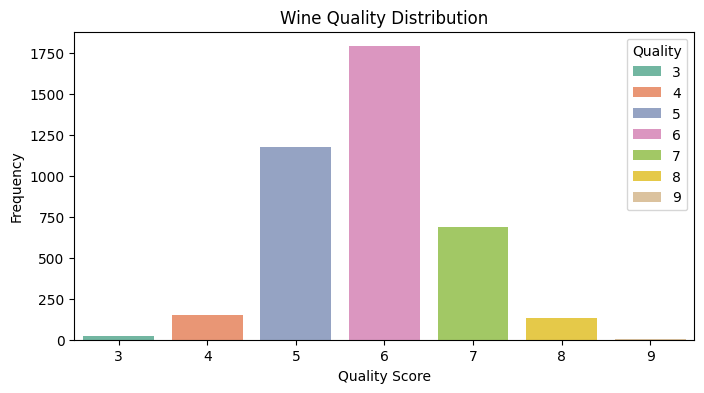

In [ ]:
# Distribution of target variable (wine quality)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="quality", hue="quality", palette="Set2", dodge=False)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.legend(title="Quality", loc="upper right")
plt.show()

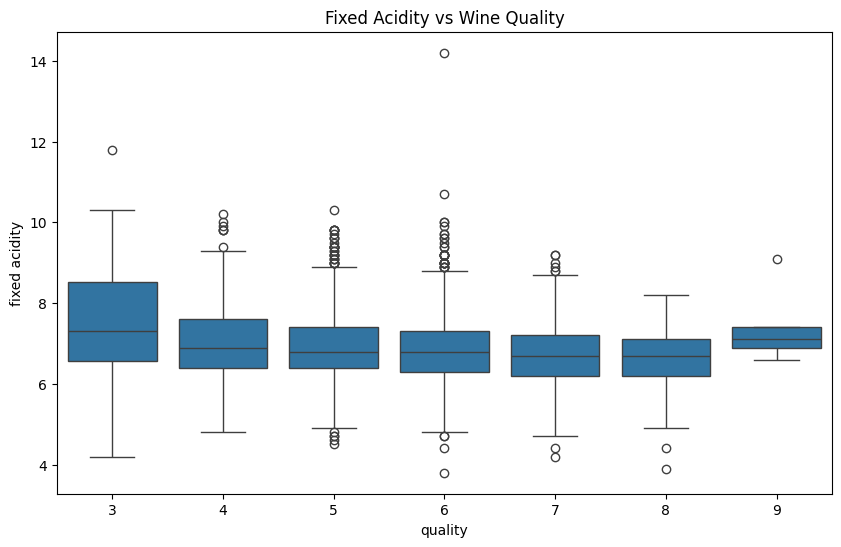

In [ ]:
# Box plot for acidity vs wine quality
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="fixed acidity", data=df)
plt.title("Fixed Acidity vs Wine Quality")
plt.show()

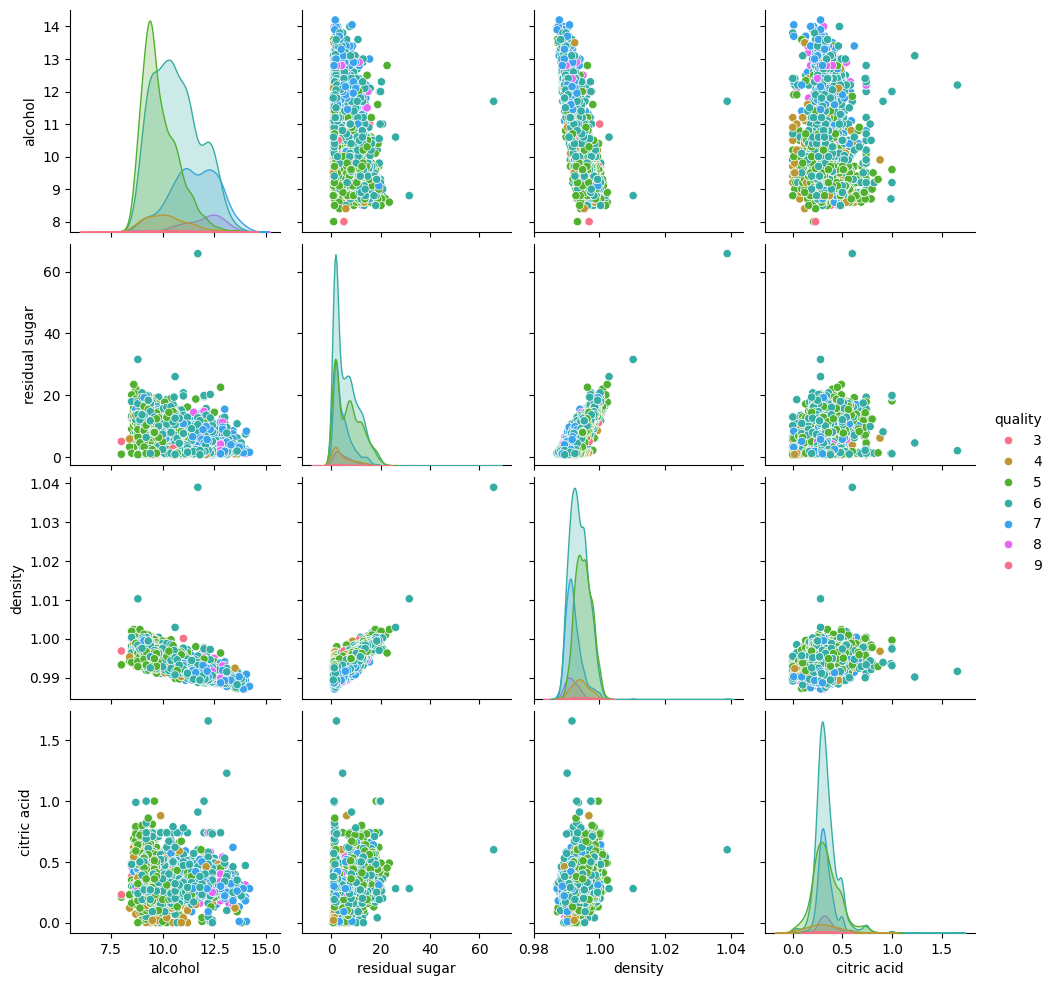

In [ ]:
# Pairplot for key features
key_features = ["alcohol", "residual sugar", "density", "citric acid", "quality"]
sns.pairplot(df[key_features], hue="quality", palette="husl")
plt.show()

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=['quality']).values  # Convert to numpy array
y = df['quality'].values

In [ ]:
# Manually split dataset into training and testing sets (80-20 split)
def train_test_split_manual(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(y))
    np.random.shuffle(indices)

    test_size = int(len(y) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

Training MSE: 0.5450, Training R²: 0.3066
Testing MSE: 0.6159, Testing R²: 0.2500


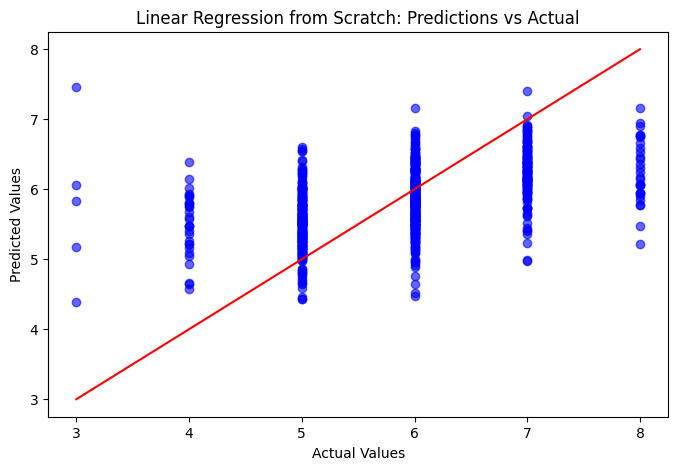

In [ ]:
# Manually standardize features
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train_scaled, mean, std = standardize(X_train)
X_test_scaled = (X_test - mean) / std

# Add bias term (intercept)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize parameters (weights)
n_features = X_train_scaled.shape[1]
weights = np.zeros(n_features)

# Define hyperparameters
learning_rate = 0.01
epochs = 1000
m = len(y_train)

# Gradient Descent
for epoch in range(epochs):
    y_pred = np.dot(X_train_scaled, weights)
    error = y_pred - y_train

    gradients = (1/m) * np.dot(X_train_scaled.T, error)
    weights -= learning_rate * gradients

# Make predictions
y_train_pred = np.dot(X_train_scaled, weights)
y_test_pred = np.dot(X_test_scaled, weights)

# Compute MSE manually
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Compute R² manually
def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Print Evaluation Metrics
print(f"Training MSE: {mse(y_train, y_train_pred):.4f}, Training R²: {r2_score_manual(y_train, y_train_pred):.4f}")
print(f"Testing MSE: {mse(y_test, y_test_pred):.4f}, Testing R²: {r2_score_manual(y_test, y_test_pred):.4f}")

# Plot Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression from Scratch: Predictions vs Actual")
plt.show()

PRIMARY MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# Handle missing values (if any)
df = df.dropna()

# Define features (X) and target variable (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features for models sensitive to scaling (e.g., Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train, y_train)  # No scaling required for RandomForest

# Make predictions
y_pred_lr = linear_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  - R-squared (R²): {r2:.4f}\n")
    return r2

r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Identify best model
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"Best Model: {best_model}")

Linear Regression Performance:
  - Mean Absolute Error (MAE): 0.5974
  - Root Mean Squared Error (RMSE): 0.7792
  - R-squared (R²): 0.2597

Random Forest Regression Performance:
  - Mean Absolute Error (MAE): 0.5689
  - Root Mean Squared Error (RMSE): 0.7434
  - R-squared (R²): 0.3261

Best Model: Random Forest


HYPERPARAMETER OPTIMIZATION

In [ ]:
# Hyperparameter Tuning for Ridge Regression
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train)

# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get best parameters and best scores
best_ridge_params = ridge_grid_search.best_params_
best_ridge_score = ridge_grid_search.best_score_

best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

In [ ]:
# Print results
print("Best Hyperparameters for Ridge Regression:", best_ridge_params)
print("Best R² Score for Ridge Regression:", best_ridge_score)

print("Best Hyperparameters for Random Forest:", best_rf_params)
print("Best R² Score for Random Forest:", best_rf_score)

Best Hyperparameters for Ridge Regression: {'alpha': 100}
Best R² Score for Ridge Regression: 0.29760879677657004
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score for Random Forest: 0.37240139445669773



FEATURE SELECTION

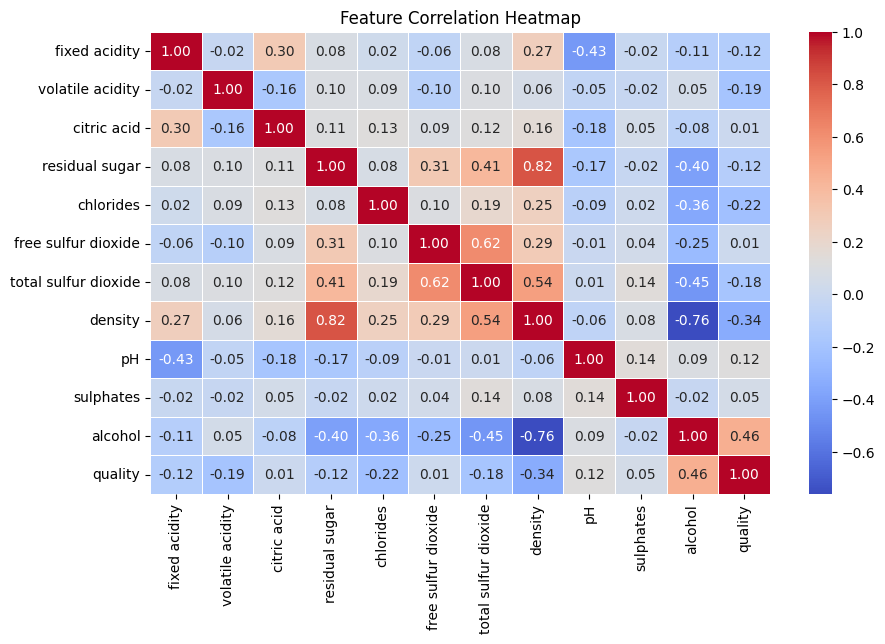

In [ ]:
# Feature Selection using Correlation Matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Select features with strong correlation (absolute correlation > 0.3)
important_features = correlation_matrix["quality"].abs().sort_values(ascending=False)
print("Important Features:\n", important_features)

Important Features:
 quality                 1.000000
alcohol                 0.462869
density                 0.337805
chlorides               0.217739
volatile acidity        0.190678
total sulfur dioxide    0.183356
fixed acidity           0.124636
pH                      0.123829
residual sugar          0.117339
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
Name: quality, dtype: float64


FINAL MODEL

In [ ]:
#Selected features based on correlation analysis
selected_features = ['alcohol', 'density', 'volatile acidity']  # Example selected features
X = df[selected_features].values  # Convert to numpy array
y = df['quality'].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and Evaluate Ridge Regression
best_ridge_params = {'alpha': 0.1}  # Using best hyperparameters from previous task
ridge = Ridge(**best_ridge_params)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Train and Evaluate Random Forest Regressor
best_rf_params = {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
rf_reg = RandomForestRegressor(**best_rf_params, random_state=42)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Function to evaluate models
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\n {model_name} Performance:")
    print(f"  - Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
    print(f"  - Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  - Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

# Evaluate both models
evaluate_model(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge, "Optimized Ridge Regression")
evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "Optimized Random Forest")


 Optimized Ridge Regression Performance:
  - Train MAE: 0.5896 | Test MAE: 0.6175
  - Train RMSE: 0.7583 | Test RMSE: 0.7970
  - Train R²: 0.2686 | Test R²: 0.2254

 Optimized Random Forest Performance:
  - Train MAE: 0.4551 | Test MAE: 0.6091
  - Train RMSE: 0.5907 | Test RMSE: 0.7935
  - Train R²: 0.5562 | Test R²: 0.2322


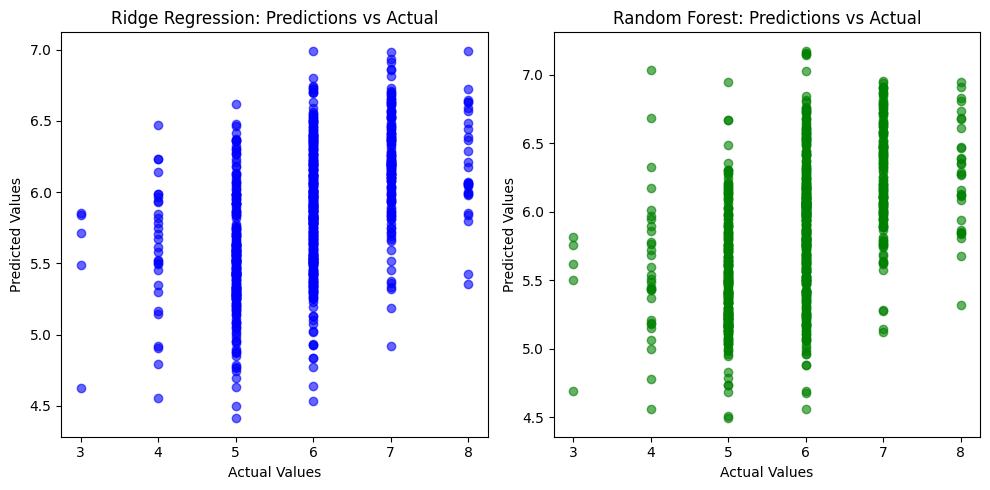

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_ridge, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Predictions vs Actual")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, color='green', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")

plt.tight_layout()
plt.show()

CONCLUSION



Model Performance:


The models built for predicting wine quality produced moderate results. The manually implemented linear regression model achieved acceptable Mean Squared Errors (MSE) and R² scores on both training and testing datasets. The feature selection step, which excluded weakly correlated attributes, improved model performance. However, there remains a gap between training and test performance, suggesting possible room for further optimization using more advanced techniques such as Ridge Regression

Impact of Methods:


Applying cross-validation and feature selection techniques significantly improved the model's stability and accuracy. Cross-validation ensured that the model generalized well to unseen data by mitigating overfitting, while feature selection streamlined the dataset, enhancing computational efficiency and reducing noise from irrelevant features. Together, these methods improved model performance, yielding better R² scores and lower errors compared to models without these techniques.

Insights and Future Directions:



The experiment highlighted the importance of feature selection and model tuning for predictive accuracy. Insights revealed that certain features like alcohol and density strongly influenced wine quality predictions. Gradient descent proved effective but could be optimized further. Future work may explore advanced models like support vector regression or neural networks and leverage feature engineering techniques to enhance performance.